Objective:
This project analyzes biodiversity data from the U.S. National Parks Service to understand the distribution and conservation status of species observed across various national parks. By exploring the dataset, we aim to uncover insights into how species are classified, the prevalence of endangered animals, and the relationship between species types and their conservation status.

Key Questions Explored:

What is the distribution of conservation status for species?

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status statistically significant?

Which species are most commonly observed and how are they distributed among different parks?

Data Source:
This project utilizes two datasets—observations.csv and species_info.csvb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
observation = pd.read_csv('observations.csv')
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
# dimension of data
print(f"species shape : {species.shape}")
print(f"observation shape : {observation.shape}")

species shape : (5824, 4)
observation shape : (23296, 3)


The species dataset contains 4 columns and 5,824 rows, while the observations dataset consists of 3 columns and 23,296 rows.

## Explore Data

In [5]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


- The category column in the species dataset contains 5,824 entries with 7 unique categories.

- The scientific_name column contains 5,824 entries with 5,541 unique scientific names.

- The common_names column contains 5,824 entries with 5,504 unique common names.

- The conservation_status column contains 191 non null entries with 4 unique common names.

In [6]:
species.conservation_status.isnull().sum()

5633

In [7]:
(1- species['conservation_status'].count()/species['category'].count()) * 100

96.72046703296702

The conservation_status column contains 5,633 null values, which accounts for approximately 96.72% of the data.

#### Observation Datasets

In [8]:
observation.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [9]:
(1- observation.count()/observation['scientific_name'].count()) * 100

scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64

- The observations dataset contains 23,296 rows, with no null values in any of the columns.

- The scientific_name column has 5,541 unique values.

- The park_name column has 4 unique values.

### Analysis

In [10]:
species['conservation_status'].value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

The conservation_status column includes 4 unique values related to protected species: 'Species of Concern', 'Endangered', 'Threatened', and 'In Recovery'.
However, this column contains 96.70% null values, indicating that the majority of species do not have an assigned conservation status. These values will need to be converted to 'No Intervention'.

In [11]:
species['conservation_status'].fillna('No Intervention', inplace=True)

In [12]:
species['conservation_status'].value_counts()

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

In [13]:
conservation_status_count = species['conservation_status'].value_counts().reset_index()
conservation_status_count.head()

,conservation_status,count
0,No Intervention,5633
1,Species of Concern,161
2,Endangered,16
3,Threatened,10
4,In Recovery,4


Text(0, 0.5, 'Conservation Status')

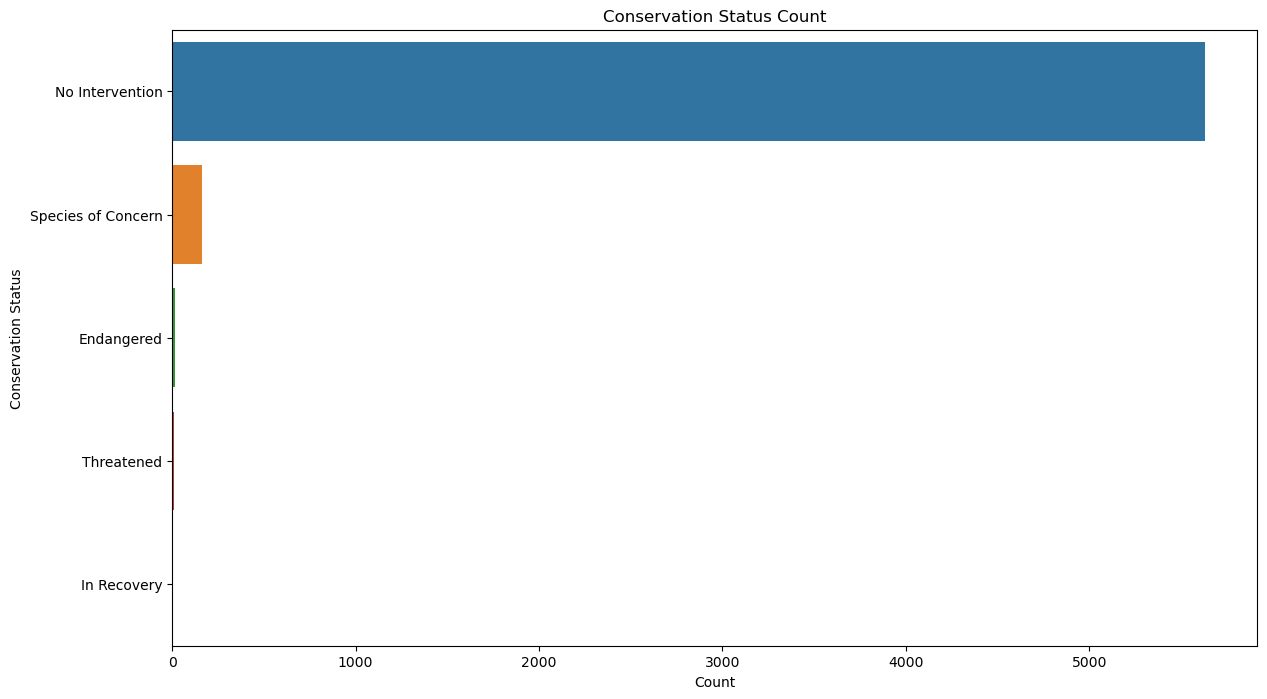

In [14]:
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='conservation_status', data=conservation_status_count)
plt.title('Conservation Status Count')
plt.xlabel('Count')
plt.ylabel('Conservation Status')

The distribution shows that the majority of species fall under 'No Intervention', while relatively few are listed under categories such as 'Endangered', 'Threatened', 'Species of Concern', or 'In Recovery'.

In [15]:
species.duplicated().sum()

0

In [16]:
endangered_species = species[species['conservation_status'] == 'Endangered']['category'].value_counts().reset_index()
endangered_species.columns = ['category', 'endangered_count']
endangered_species

,category,endangered_count
0,Mammal,7
1,Bird,4
2,Fish,3
3,Vascular Plant,1
4,Amphibian,1


In [17]:
total_species = species['category'].value_counts().reset_index()
total_species.columns = ['category', 'total_count']
total_species

,category,total_count
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


In [18]:
merged = pd.merge(total_species, endangered_species, on='category', how='left')
merged['endangered_count'] = merged['endangered_count'].fillna(0) 
merged

,category,total_count,endangered_count
0,Vascular Plant,4470,1.0
1,Bird,521,4.0
2,Nonvascular Plant,333,0.0
3,Mammal,214,7.0
4,Fish,127,3.0
5,Amphibian,80,1.0
6,Reptile,79,0.0


In [19]:
merged['percent_endangered'] = (merged['endangered_count'] / merged['total_count']) * 100
merged = merged.sort_values('percent_endangered', ascending=False)
merged

,category,total_count,endangered_count,percent_endangered
3,Mammal,214,7.0,3.271028
4,Fish,127,3.0,2.362205
5,Amphibian,80,1.0,1.250000
1,Bird,521,4.0,0.767754
0,Vascular Plant,4470,1.0,0.022371
2,Nonvascular Plant,333,0.0,0.000000
6,Reptile,79,0.0,0.000000


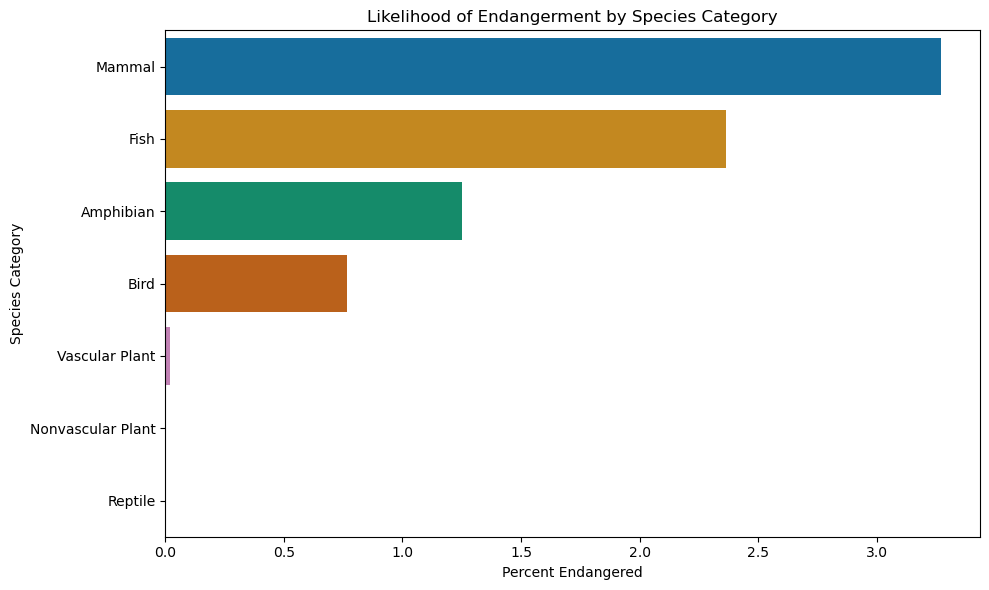

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged, x='percent_endangered', y='category', palette='colorblind')
plt.xlabel('Percent Endangered')
plt.ylabel('Species Category')
plt.title('Likelihood of Endangerment by Species Category')
plt.tight_layout()

Based on the analysis, Mammals have the highest percentage of endangered species at 3.27%, followed by Fish (2.36%) and Amphibians (1.25%). In contrast, Vascular Plants, Nonvascular Plants, and Reptiles have very low or zero representation among endangered species.

Chi-Square Test can be used to see if two categorical variables are related

In [21]:
contingency = pd.crosstab(species['category'], species['conservation_status'])
contingency

conservation_status,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,73,4,2
Bird,4,3,442,72,0
Fish,3,0,116,4,4
Mammal,7,1,176,28,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,74,5,0
Vascular Plant,1,0,4424,43,2


In [22]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(contingency)

In [23]:
print(f"Chi-Square value: {chi2}")
print(f"P-Value: {pval}")

Chi-Square value: 628.581965798279
P-Value: 2.4551423165990194e-117


Since the p-value is significantly below the typical threshold of 0.05, we conclude that there is a statistically significant association between species category and conservation status.

In [24]:
most_observed_species = observation.groupby('scientific_name')['observations'].sum().reset_index()
most_observed_species = most_observed_species.sort_values(by='observations', ascending=False).head(10)
most_observed_species

,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725
2555,Hypochaeris radicata,1720
4179,Puma concolor,1711
4109,Procyon lotor,1692
1359,Columba livia,1653
3322,Myotis lucifugus,1547
583,Bidens tripartita,1296
3494,Oxalis dillenii,1276


In [25]:
top_species = most_observed_species['scientific_name'].tolist()
distribution = observation[observation['scientific_name'].isin(top_species)]
distribution = distribution.pivot_table(index='scientific_name', columns='park_name', values='observations', aggfunc='sum', fill_value=0)
distribution

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
scientific_name,,,,
Bidens tripartita,264,176,602,254
Castor canadensis,278,243,703,501
Columba livia,339,169,722,423
Holcus lanatus,296,216,805,463
Hypochaeris radicata,294,195,726,505
Myotis lucifugus,298,174,679,396
Oxalis dillenii,254,180,521,321
Procyon lotor,247,247,745,453
Puma concolor,311,239,753,408


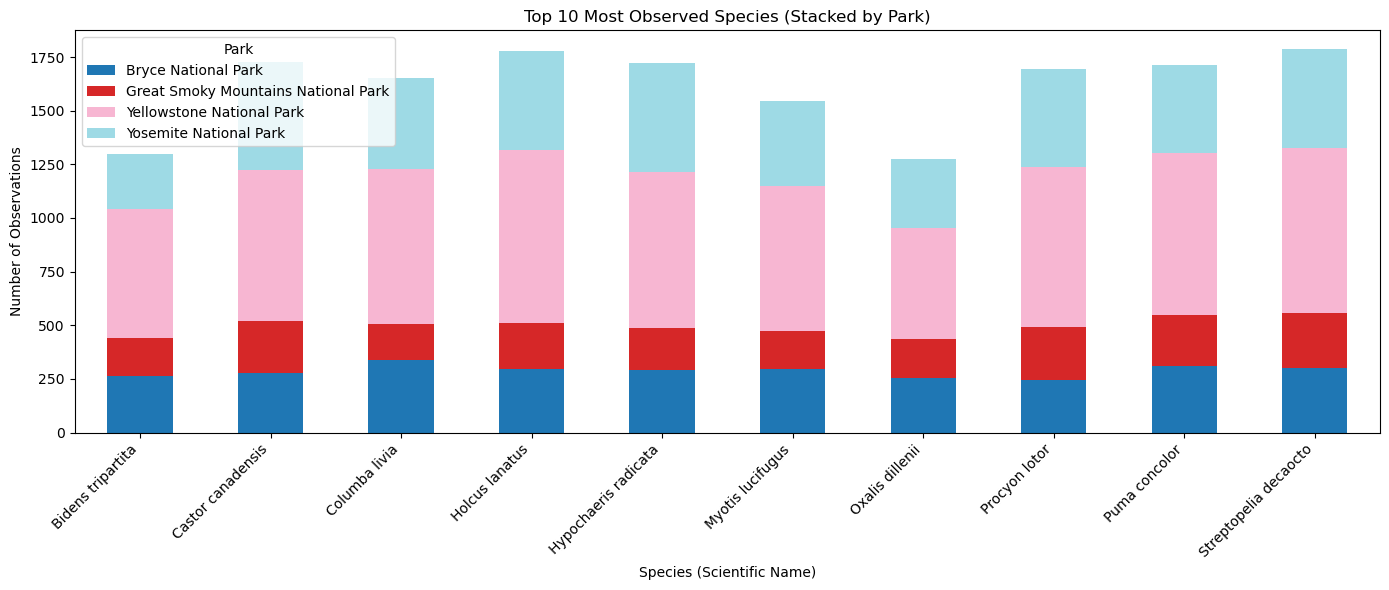

In [26]:
distribution.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Top 10 Most Observed Species (Stacked by Park)')
plt.xlabel('Species (Scientific Name)')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Park')
plt.tight_layout()
plt.show()

The top 10 most commonly observed species are consistently found across all four national parks, with Yellowstone National Park showing the highest observation counts for most species.